In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Circle, Wedge
from matplotlib.collections import PatchCollection

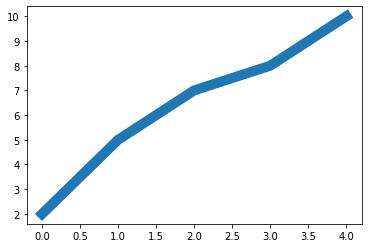

In [2]:
# 1) 直接在plot()函数中设置
x = range(0,5)
y = [2,5,7,8,10]
plt.plot(x,y, linewidth=10); # 设置线的粗细参数为10

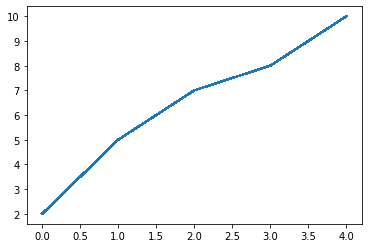

In [3]:
# 2) 通过获得线对象，对线对象进行设置
x = range(0,5)
y = [2,5,7,8,10]
line, = plt.plot(x, y, '-') # 这里等号坐标的line,是一个列表解包的操作，目的是获取plt.plot返回列表中的Line2D对象
line.set_antialiased(False); # 关闭抗锯齿功能

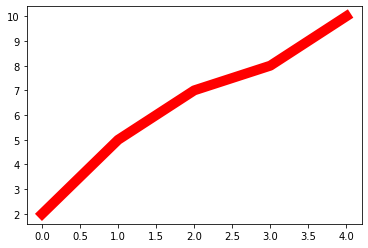

In [4]:
# 3) 获得线属性，使用setp()函数设置
x = range(0,5)
y = [2,5,7,8,10]
lines = plt.plot(x, y)
plt.setp(lines, color='r', linewidth=10);

